#### Associations Between Quantitative and Categorical Variables

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.
we’ll explore a dataset that contains the following information about students at two portuguese schools:

- school: the school each student attends, Gabriel Periera ('GP') or Mousinho da Silveria ('MS')
- address: the location of the student’s home ('U' for urban and 'R' for rural)
- absences: the number of times the student was absent during the school year
- Mjob: the student’s mother’s job industry
- Fjob: the student’s father’s job industry
- G3: the student’s score on a math assessment, ranging from 0 to 20

Suppose we want to know: Is a student’s score (G3) associated with their school (school)? If so, then knowing what school a student attends gives us information about what their score is likely to be. For example, maybe students at one of the schools consistently score higher than students at the other school.

To start answering this question, it is useful to save scores from each school in two separate lists:

`scores_GP = students.G3[students.school == 'GP']`

`scores_MS = students.G3[students.school == 'MS']`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
students = pd.read_csv('../Datasets/students.csv')
students.head(3)

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10


Suppose that we want to know whether there is an association between student math scores (G3) and the student’s address (urban or rural). Separate out G3 scores into two separate lists: one for students who live in an urban location ('U') and one for students who live in a rural location ('R')

In [3]:
#separate out scores for students who live in urban and rural locations:
scores_urban = students[students['address'] == 'U']['G3']
scores_rural = students[students['address'] == 'R']['G3']

Highly associated variables tend to have a large mean or median difference. 

In [4]:
#calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

#print mean scores:
print('Mean score - students w/ urban address:')
print(scores_urban_mean)
print('Mean score - students w/ rural address:')
print(scores_rural_mean)

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(mean_diff)

#calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

#calculate median difference
median_diff = scores_urban_median - scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)


Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

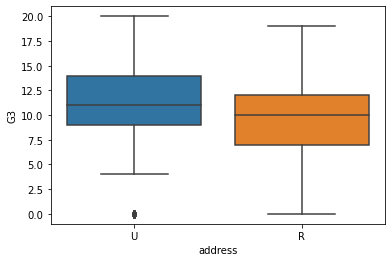

In [6]:
#create the boxplot here:
sns.boxplot(data = students, x = 'address', y = 'G3')
plt.show()

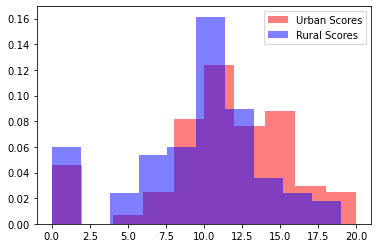

In [8]:
#create the overlapping histograms here:
plt.hist(scores_urban, alpha = 0.5, density = True, color = 'red', label = 'Urban Scores')
plt.hist(scores_rural, alpha = 0.5, density = True, color = 'blue', label = 'Rural Scores')
plt.legend()
plt.show()

#### Exploring Non-Binary Categorical Variables

In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

When looking at an association between a quantitative variable and a non-binary categorical variable, we must examine all pair-wise differences. For example, suppose we want to know whether or not an association exists between math scores (G3) and (Mjob), a categorical variable representing the mother’s job. This variable has five possible categories: `at_home`, `health`, `services`, `teacher`, or `other`. There are actually 10 different comparisons that we can make. For example, we can compare scores for students whose mothers work at_home or in `health; at_home or other; at home or `services; etc.. The easiest way to quickly visualize these comparisons is with side-by-side box plots:

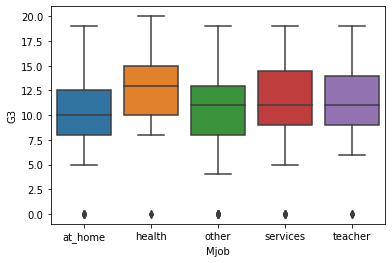

In [10]:
sns.boxplot(data = students, x = 'Mjob', y = 'G3')
plt.show()